In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [3]:
paygap_data = pd.read_csv('Glassdoor Gender Pay Gap.csv')

# Exploratory Analysis

In [4]:
paygap_data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [5]:
paygap_data.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [6]:
paygap_data.info

<bound method DataFrame.info of                 JobTitle  Gender  Age  PerfEval    Education            Dept  \
0       Graphic Designer  Female   18         5      College      Operations   
1      Software Engineer    Male   21         5      College      Management   
2    Warehouse Associate  Female   19         4          PhD  Administration   
3      Software Engineer    Male   20         5      Masters           Sales   
4       Graphic Designer    Male   26         5      Masters     Engineering   
..                   ...     ...  ...       ...          ...             ...   
995  Marketing Associate  Female   61         1  High School  Administration   
996       Data Scientist    Male   57         1      Masters           Sales   
997    Financial Analyst    Male   48         1  High School      Operations   
998    Financial Analyst    Male   65         2  High School  Administration   
999    Financial Analyst    Male   60         1          PhD           Sales   

     Se

In [7]:
paygap_data.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [8]:
paygap_data_subset = paygap_data[['JobTitle', 'Gender', 'Age', 'Education', 'Dept', 'BasePay', 'Bonus']]
paygap_data_subset

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
0,Graphic Designer,Female,18,College,Operations,42363,9938
1,Software Engineer,Male,21,College,Management,108476,11128
2,Warehouse Associate,Female,19,PhD,Administration,90208,9268
3,Software Engineer,Male,20,Masters,Sales,108080,10154
4,Graphic Designer,Male,26,Masters,Engineering,99464,9319
...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,High School,Administration,62644,3270
996,Data Scientist,Male,57,Masters,Sales,108977,3567
997,Financial Analyst,Male,48,High School,Operations,92347,2724
998,Financial Analyst,Male,65,High School,Administration,97376,2225


In [9]:
paygap_data_subset.info

<bound method DataFrame.info of                 JobTitle  Gender  Age    Education            Dept  BasePay  \
0       Graphic Designer  Female   18      College      Operations    42363   
1      Software Engineer    Male   21      College      Management   108476   
2    Warehouse Associate  Female   19          PhD  Administration    90208   
3      Software Engineer    Male   20      Masters           Sales   108080   
4       Graphic Designer    Male   26      Masters     Engineering    99464   
..                   ...     ...  ...          ...             ...      ...   
995  Marketing Associate  Female   61  High School  Administration    62644   
996       Data Scientist    Male   57      Masters           Sales   108977   
997    Financial Analyst    Male   48  High School      Operations    92347   
998    Financial Analyst    Male   65  High School  Administration    97376   
999    Financial Analyst    Male   60          PhD           Sales   123108   

     Bonus  
0     

## Checks for Missing Values

In [10]:
paygap_data_subset.isna().sum()

JobTitle     0
Gender       0
Age          0
Education    0
Dept         0
BasePay      0
Bonus        0
dtype: int64

## Categorical Values Checks

In [11]:
paygap_data_subset['Gender'].value_counts()

Male      532
Female    468
Name: Gender, dtype: int64

In [12]:
paygap_data_subset['Education'].value_counts()

High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

In [13]:
paygap_data_subset['Dept'].value_counts()

Operations        210
Sales             207
Management        198
Administration    193
Engineering       192
Name: Dept, dtype: int64

In [14]:
paygap_data_subset['JobTitle'].value_counts()

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

## Basic Statistics

In [15]:
paygap_data_subset.describe()

,Age,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000
mean,41.393000,94472.653000,6467.161000
std,14.294856,25337.493272,2004.377365
min,18.000000,34208.000000,1703.000000
25%,29.000000,76850.250000,4849.500000
50%,41.000000,93327.500000,6507.000000
75%,54.250000,111558.000000,8026.000000
max,65.000000,179726.000000,11293.000000


## Visualizations of Major Variables

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'BasePay'}>],
       [<AxesSubplot: title={'center': 'Bonus'}>, <AxesSubplot: >]],
      dtype=object)

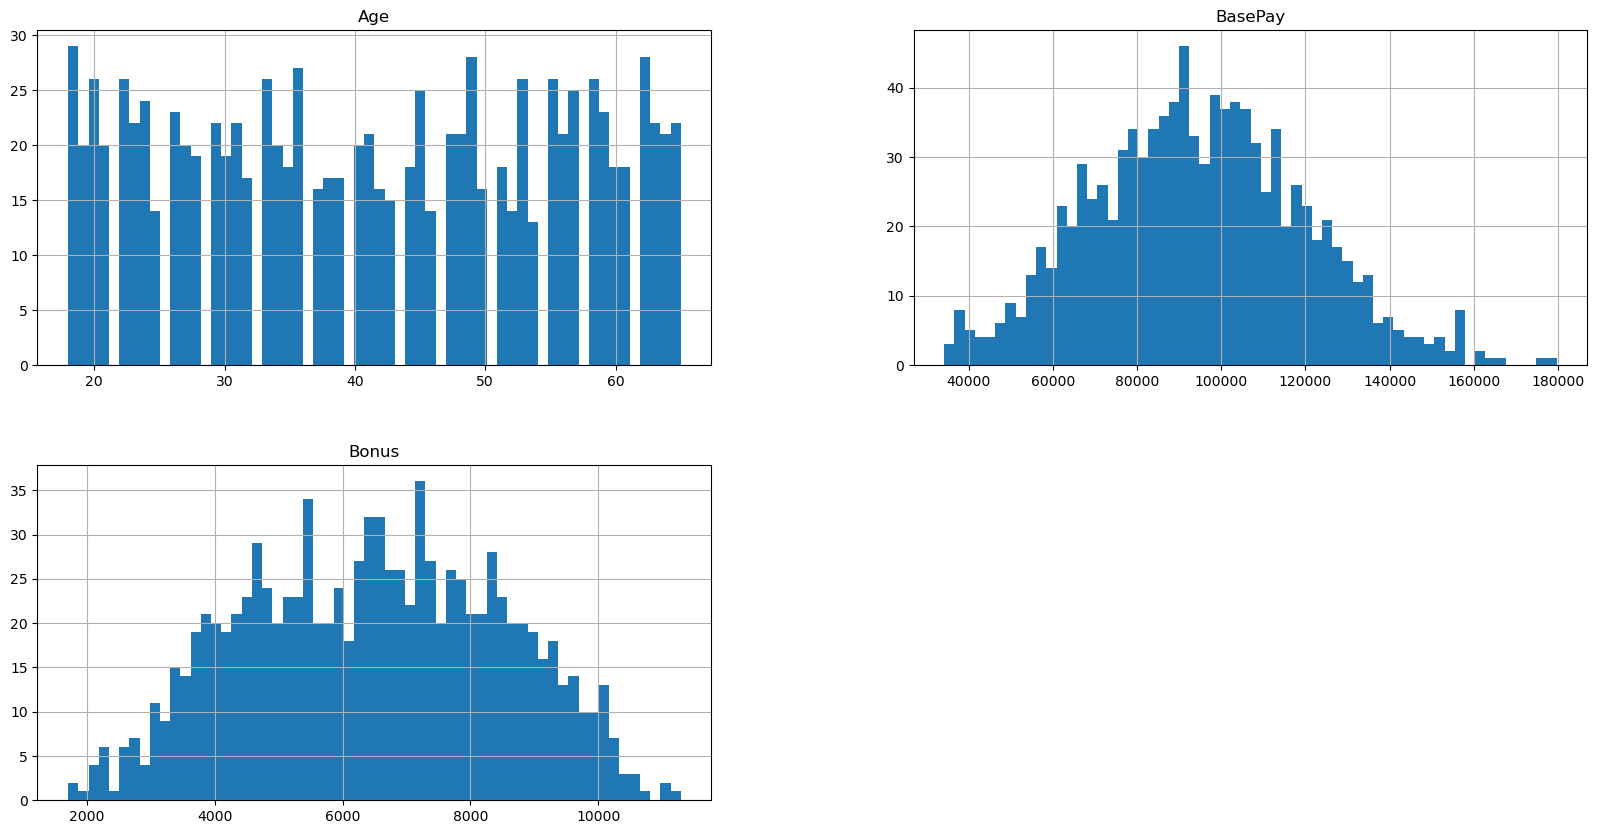

In [16]:
paygap_data_subset.hist(bins=60, figsize=(20,10))

<AxesSubplot: xlabel='BasePay', ylabel='Bonus'>

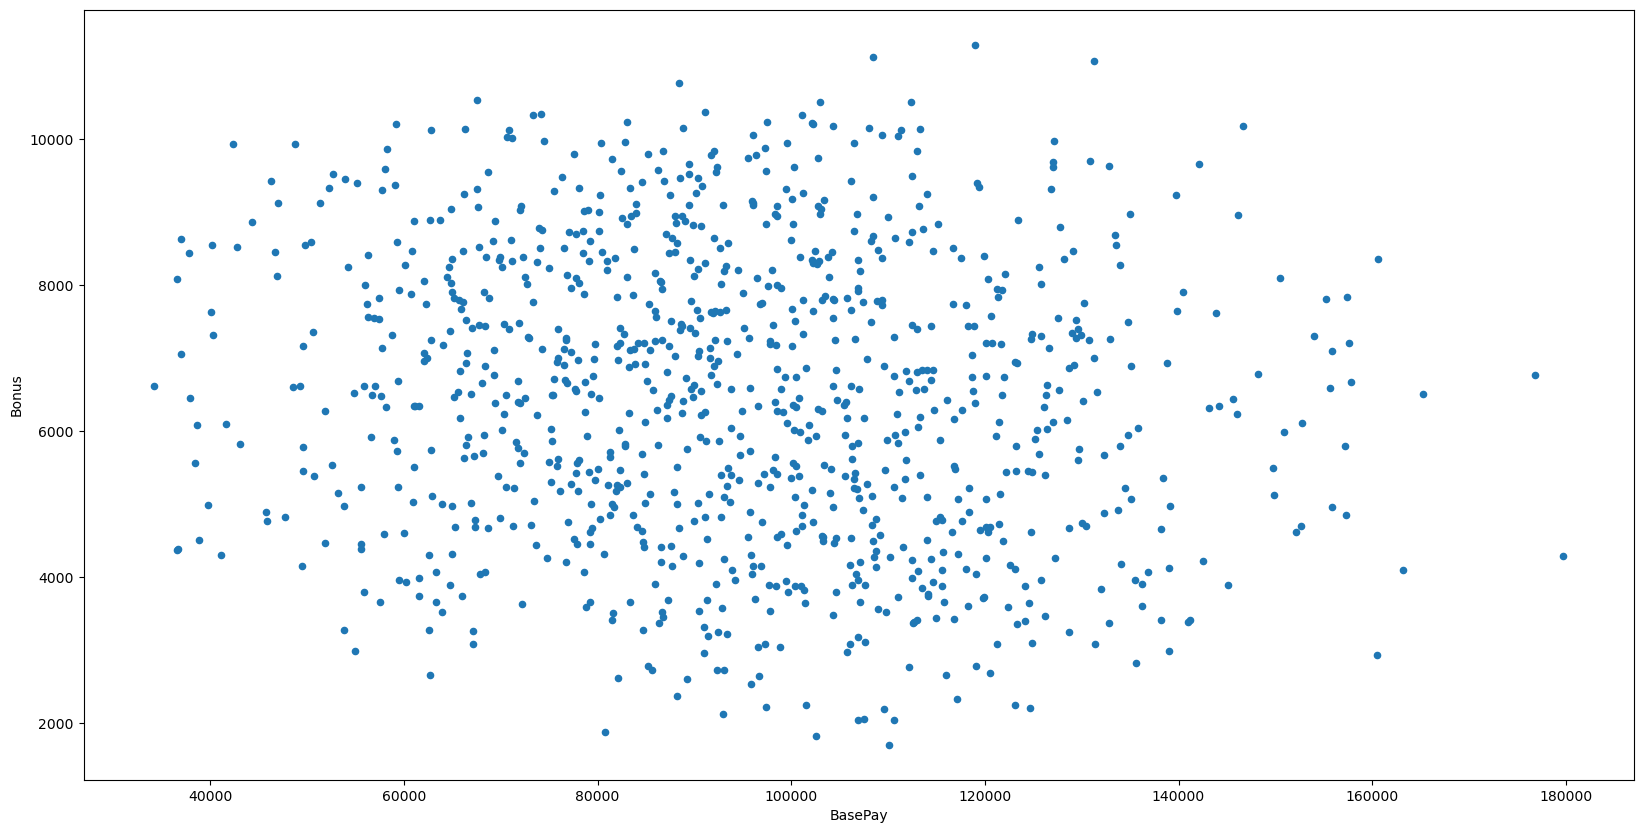

In [17]:
paygap_data_subset[['BasePay','Bonus']].plot(kind='scatter', x='BasePay', y='Bonus', figsize=(20,10))

# Data Wrangling / Cleansing

## No missing values in dataset confirmed in data exploration above. 
## Review for Outliers:

In [18]:
big_base_pay = paygap_data_subset[(paygap_data_subset['BasePay']>160000)]
big_base_pay

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
353,Manager,Male,59,PhD,Sales,176789,6773
357,Manager,Female,60,PhD,Management,160614,8354
609,IT,Male,65,Masters,Sales,165229,6506
799,Manager,Male,55,High School,Management,163208,4095
869,Software Engineer,Male,59,College,Sales,160460,2930
927,Manager,Male,58,PhD,Management,179726,4284


In [19]:
big_bonus_pay = paygap_data_subset[(paygap_data_subset['Bonus']>11000)]
big_bonus_pay

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
1,Software Engineer,Male,21,College,Management,108476,11128
44,Software Engineer,Male,25,Masters,Sales,119024,11293
70,Manager,Male,25,College,Engineering,131311,11067


In [20]:
paygap_data_subset_sansoutliers = paygap_data_subset[(paygap_data_subset['BasePay']<=160000) & (paygap_data_subset['Bonus']<=11000)]
paygap_data_subset_sansoutliers

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
0,Graphic Designer,Female,18,College,Operations,42363,9938
2,Warehouse Associate,Female,19,PhD,Administration,90208,9268
3,Software Engineer,Male,20,Masters,Sales,108080,10154
4,Graphic Designer,Male,26,Masters,Engineering,99464,9319
5,IT,Female,20,PhD,Operations,70890,10126
...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,High School,Administration,62644,3270
996,Data Scientist,Male,57,Masters,Sales,108977,3567
997,Financial Analyst,Male,48,High School,Operations,92347,2724
998,Financial Analyst,Male,65,High School,Administration,97376,2225


In [21]:
paygap_data_subset_sansoutliers.groupby('JobTitle').mean()

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/1651925769.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age,BasePay,Bonus
JobTitle,,,
Data Scientist,41.383178,92433.420561,6484.990654
Driver,42.175824,89382.208791,6396.681319
Financial Analyst,40.794393,94996.878505,6406.747664
Graphic Designer,40.673469,90892.530612,6782.000000
IT,41.947368,89953.347368,6290.684211
Manager,42.011765,123153.129412,6012.458824
Marketing Associate,41.652542,76656.372881,6145.754237
Sales Associate,42.404255,93396.489362,6274.297872
Software Engineer,41.037736,104841.207547,6595.424528


In [22]:
paygap_data_subset_sansoutliers.groupby('JobTitle')['BasePay', 'Bonus'].describe()

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/410688729.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



BasePay                                                   \
                      count           mean           std      min        25%   
JobTitle                                                                       
Data Scientist        107.0   92433.420561  22669.120469  40056.0   75875.00   
Driver                 91.0   89382.208791  21571.711477  42722.0   72396.00   
Financial Analyst     107.0   94996.878505  21150.737273  40341.0   81410.00   
Graphic Designer       98.0   90892.530612  22897.005070  36642.0   73398.25   
IT                     95.0   89953.347368  23312.642150  37780.0   73307.50   
Manager                85.0  123153.129412  19233.181735  80259.0  109346.00   
Marketing Associate   118.0   76656.372881  21457.252706  34208.0   60713.25   
Sales Associate        94.0   93396.489362  22691.089101  37898.0   81940.50   
Software Engineer     106.0  104841.207547  24323.484981  55555.0   86844.25   
Warehouse Associate    90.0   89556.122222  20917.959674  37026.0   77044.75   

                                                    Bonus               \
                          50%        75%       max  count         mean   
JobTitle                                                                 
Data Scientist        93320.0  107968.00  141005.0  107.0  6484.990654   
Driver                89170.0  104562.50  135781.0   91.0  6396.681319   
Financial Analyst     94590.0  113060.50  146190.0  107.0  6406.747664   
Graphic Designer      94121.0  106992.00  135512.0   98.0  6782.000000   
IT                    92950.0  106177.50  133472.0   95.0  6290.684211   
Manager              121151.0  136836.00  157644.0   85.0  6012.458824   
Marketing Associate   77014.5   92962.75  128970.0  118.0  6145.754237   
Sales Associate       91921.0  107915.50  142505.0   94.0  6274.297872   
Software Engineer    104300.5  121887.75  157852.0  106.0  6595.424528   
Warehouse Associate   88339.0  105686.25  134109.0   90.0  7242.322222   

                                                                             
                             std     min      25%     50%      75%      max  
JobTitle                                                                     
Data Scientist       2038.230311  2530.0  4715.50  6580.0  8128.00  10209.0  
Driver               1779.518005  2661.0  5002.00  6295.0  7797.50  10375.0  
Financial Analyst    2037.186564  2225.0  4927.00  6578.0  7946.00  10768.0  
Graphic Designer     1985.978738  3044.0  5271.25  6714.5  8368.00  10541.0  
IT                   2185.474325  2041.0  4638.00  6257.0  8157.00  10504.0  
Manager              1683.144234  1703.0  4775.00  6179.0  7094.00  10173.0  
Marketing Associate  1939.921648  1884.0  4465.50  5944.0  7551.00  10334.0  
Sales Associate      1971.011867  1823.0  4720.00  6339.0  7515.75  10512.0  
Software Engineer    2123.152880  2193.0  4692.75  6656.0  8173.00  10240.0  
Warehouse Associate  1861.589099  2051.0  5877.75  7361.0  8642.75  10324.0

In [23]:
job_title_BasePay_stats = paygap_data_subset_sansoutliers.groupby('JobTitle')['BasePay'].describe().reset_index()[['JobTitle','25%','75%']]
job_title_BasePay_stats

,JobTitle,25%,75%
0,Data Scientist,75875.00,107968.00
1,Driver,72396.00,104562.50
2,Financial Analyst,81410.00,113060.50
3,Graphic Designer,73398.25,106992.00
4,IT,73307.50,106177.50
5,Manager,109346.00,136836.00
6,Marketing Associate,60713.25,92962.75
7,Sales Associate,81940.50,107915.50
8,Software Engineer,86844.25,121887.75
9,Warehouse Associate,77044.75,105686.25


In [24]:
job_title_Bonus_stats = paygap_data_subset_sansoutliers.groupby('JobTitle')['Bonus'].describe().reset_index()[['JobTitle','25%','75%']]
job_title_Bonus_stats

,JobTitle,25%,75%
0,Data Scientist,4715.50,8128.00
1,Driver,5002.00,7797.50
2,Financial Analyst,4927.00,7946.00
3,Graphic Designer,5271.25,8368.00
4,IT,4638.00,8157.00
5,Manager,4775.00,7094.00
6,Marketing Associate,4465.50,7551.00
7,Sales Associate,4720.00,7515.75
8,Software Engineer,4692.75,8173.00
9,Warehouse Associate,5877.75,8642.75


# Drop outliers from data_subset

In [25]:
paygap_data_subset.drop(index=paygap_data_subset[paygap_data_subset['Bonus']>11000].index)

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
0,Graphic Designer,Female,18,College,Operations,42363,9938
2,Warehouse Associate,Female,19,PhD,Administration,90208,9268
3,Software Engineer,Male,20,Masters,Sales,108080,10154
4,Graphic Designer,Male,26,Masters,Engineering,99464,9319
5,IT,Female,20,PhD,Operations,70890,10126
...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,High School,Administration,62644,3270
996,Data Scientist,Male,57,Masters,Sales,108977,3567
997,Financial Analyst,Male,48,High School,Operations,92347,2724
998,Financial Analyst,Male,65,High School,Administration,97376,2225


In [26]:
paygap_data_subset.drop(index=paygap_data_subset[paygap_data_subset['BasePay']>160000].index)

,JobTitle,Gender,Age,Education,Dept,BasePay,Bonus
0,Graphic Designer,Female,18,College,Operations,42363,9938
1,Software Engineer,Male,21,College,Management,108476,11128
2,Warehouse Associate,Female,19,PhD,Administration,90208,9268
3,Software Engineer,Male,20,Masters,Sales,108080,10154
4,Graphic Designer,Male,26,Masters,Engineering,99464,9319
...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,High School,Administration,62644,3270
996,Data Scientist,Male,57,Masters,Sales,108977,3567
997,Financial Analyst,Male,48,High School,Operations,92347,2724
998,Financial Analyst,Male,65,High School,Administration,97376,2225


In [27]:
indexCompOutliers = paygap_data_subset[(paygap_data_subset['BasePay']>160000) | (paygap_data_subset['Bonus']>11000)].index
paygap_data_subset.drop(indexCompOutliers, inplace=True)
paygap_data_subset.describe()

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/1872954087.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,BasePay,Bonus
count,991.000000,991.000000,991.000000
mean,41.338042,93953.396569,6458.860747
std,14.255878,24749.641759,1990.054083
min,18.000000,34208.000000,1703.000000
25%,29.000000,76749.500000,4852.500000
50%,41.000000,93067.000000,6505.000000
75%,54.000000,111030.000000,8013.500000
max,65.000000,157852.000000,10768.000000


In [28]:
paygap_data_subset.describe()

,Age,BasePay,Bonus
count,991.000000,991.000000,991.000000
mean,41.338042,93953.396569,6458.860747
std,14.255878,24749.641759,1990.054083
min,18.000000,34208.000000,1703.000000
25%,29.000000,76749.500000,4852.500000
50%,41.000000,93067.000000,6505.000000
75%,54.000000,111030.000000,8013.500000
max,65.000000,157852.000000,10768.000000


# Statistical Analysis

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

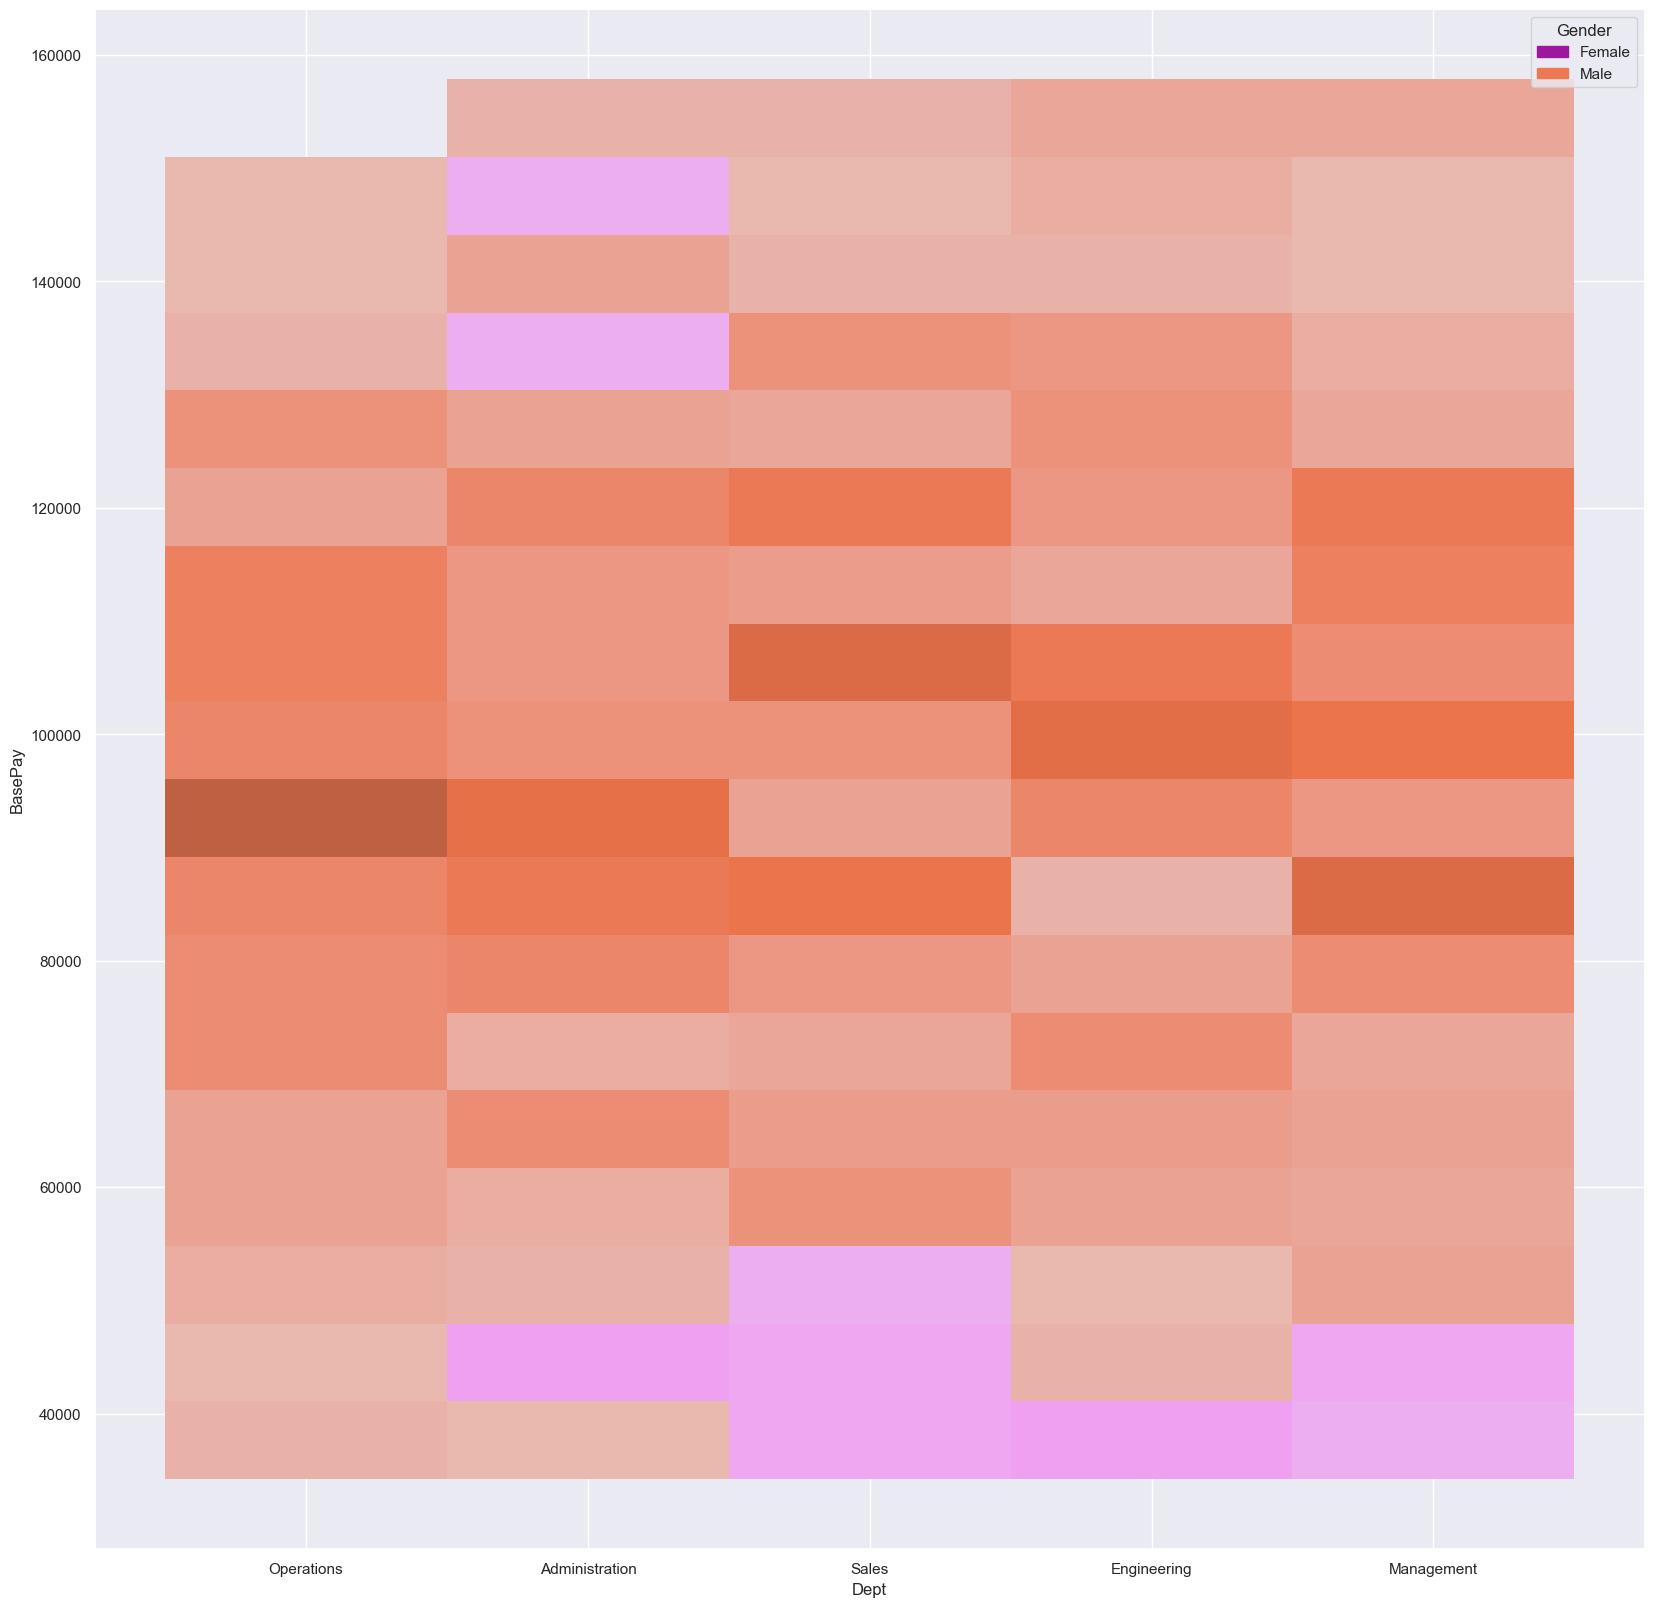

In [85]:
sns.histplot(x='Dept', y='BasePay', data=paygap_data_subset, hue='Gender', palette='plasma');

<AxesSubplot: xlabel='Dept', ylabel='Count'>

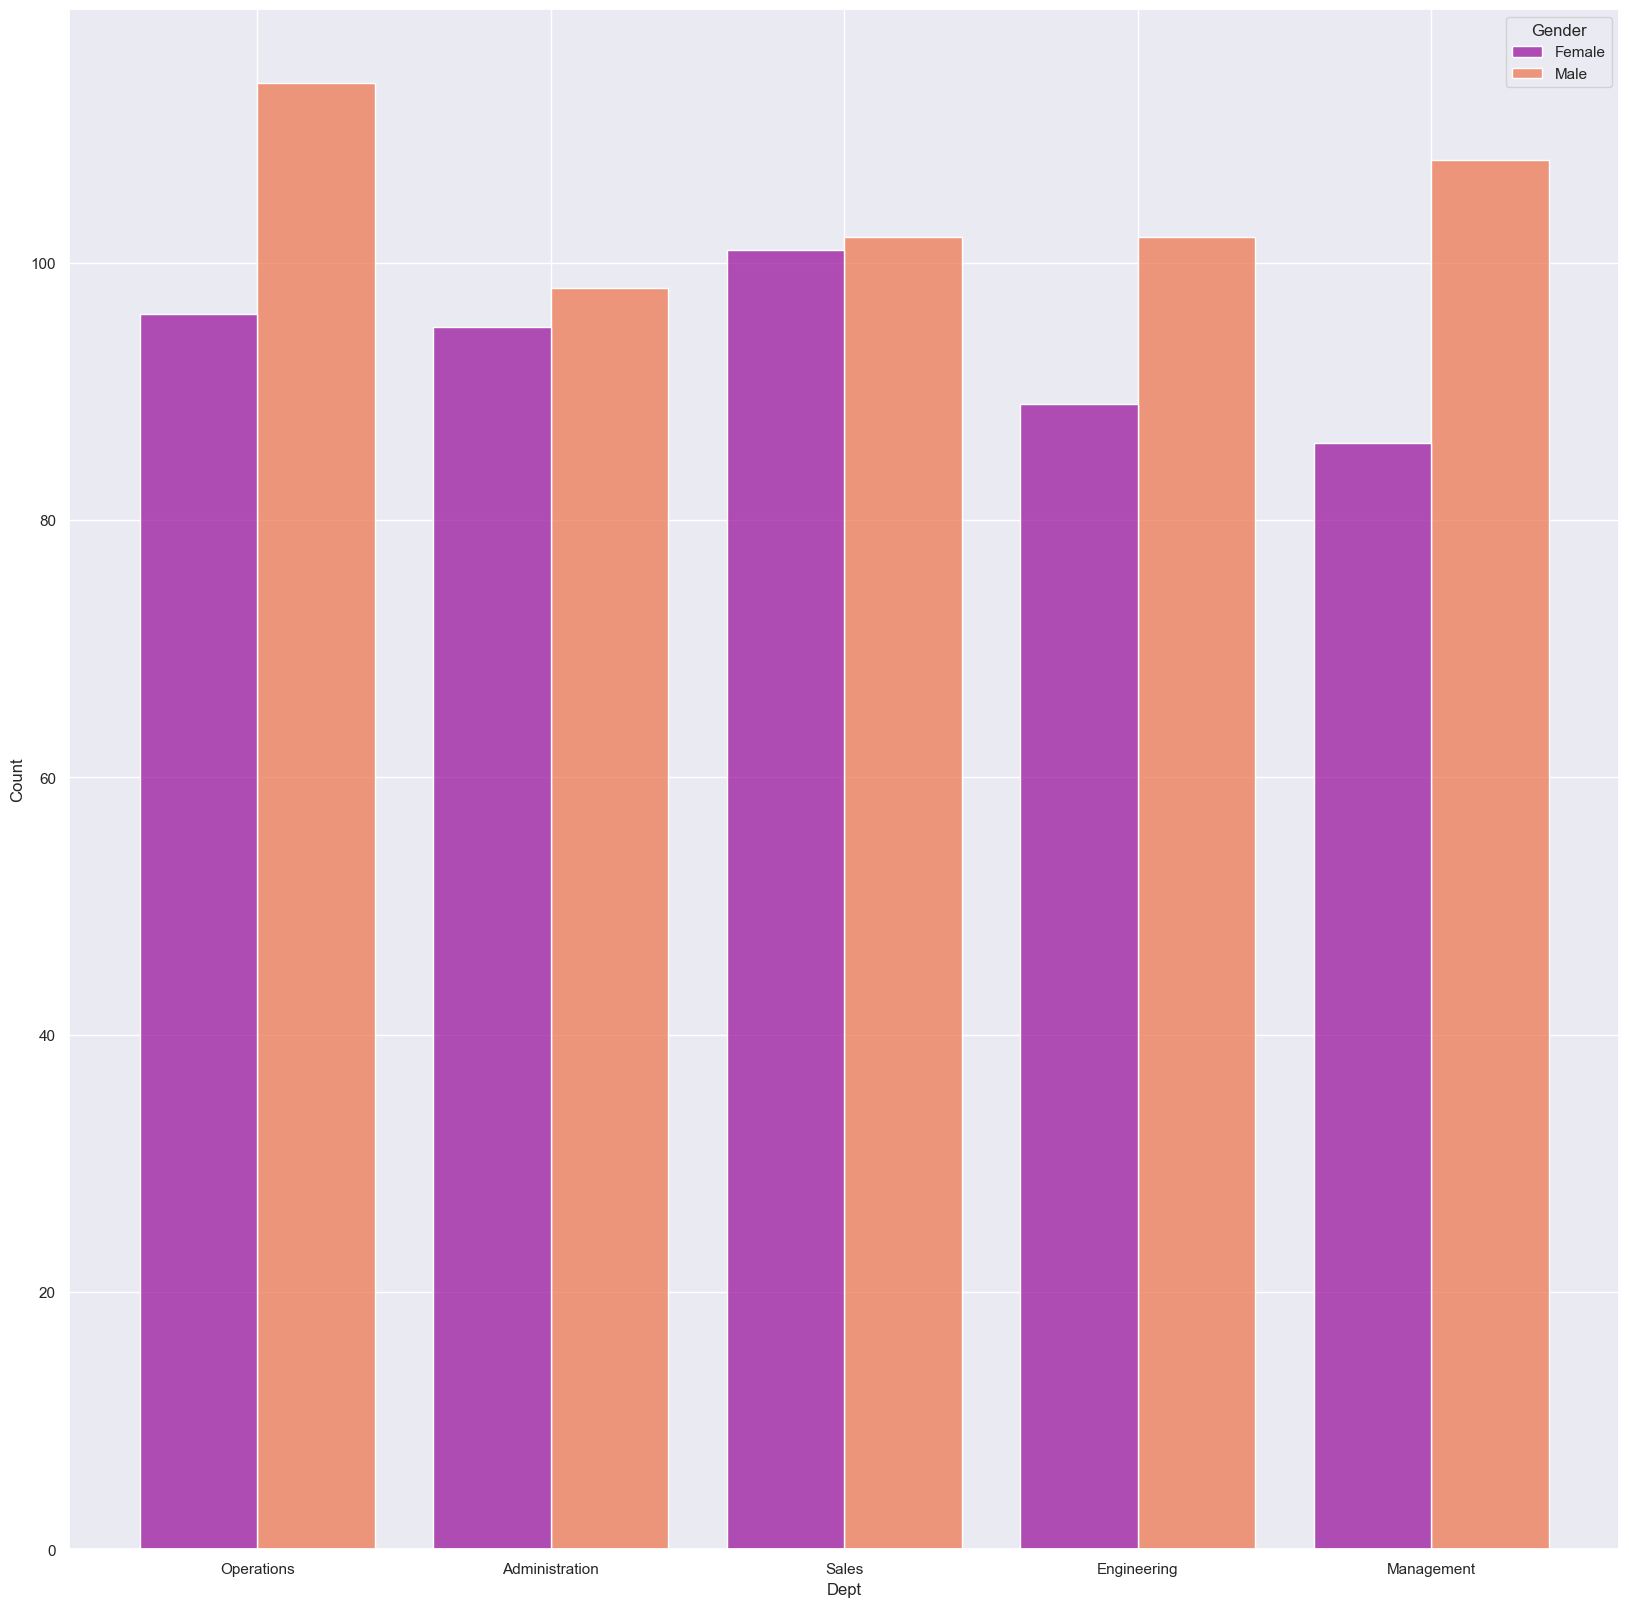

In [86]:
sns.histplot(x='Dept', hue='Gender', multiple='dodge', data=paygap_data_subset, shrink=0.8, palette='plasma')

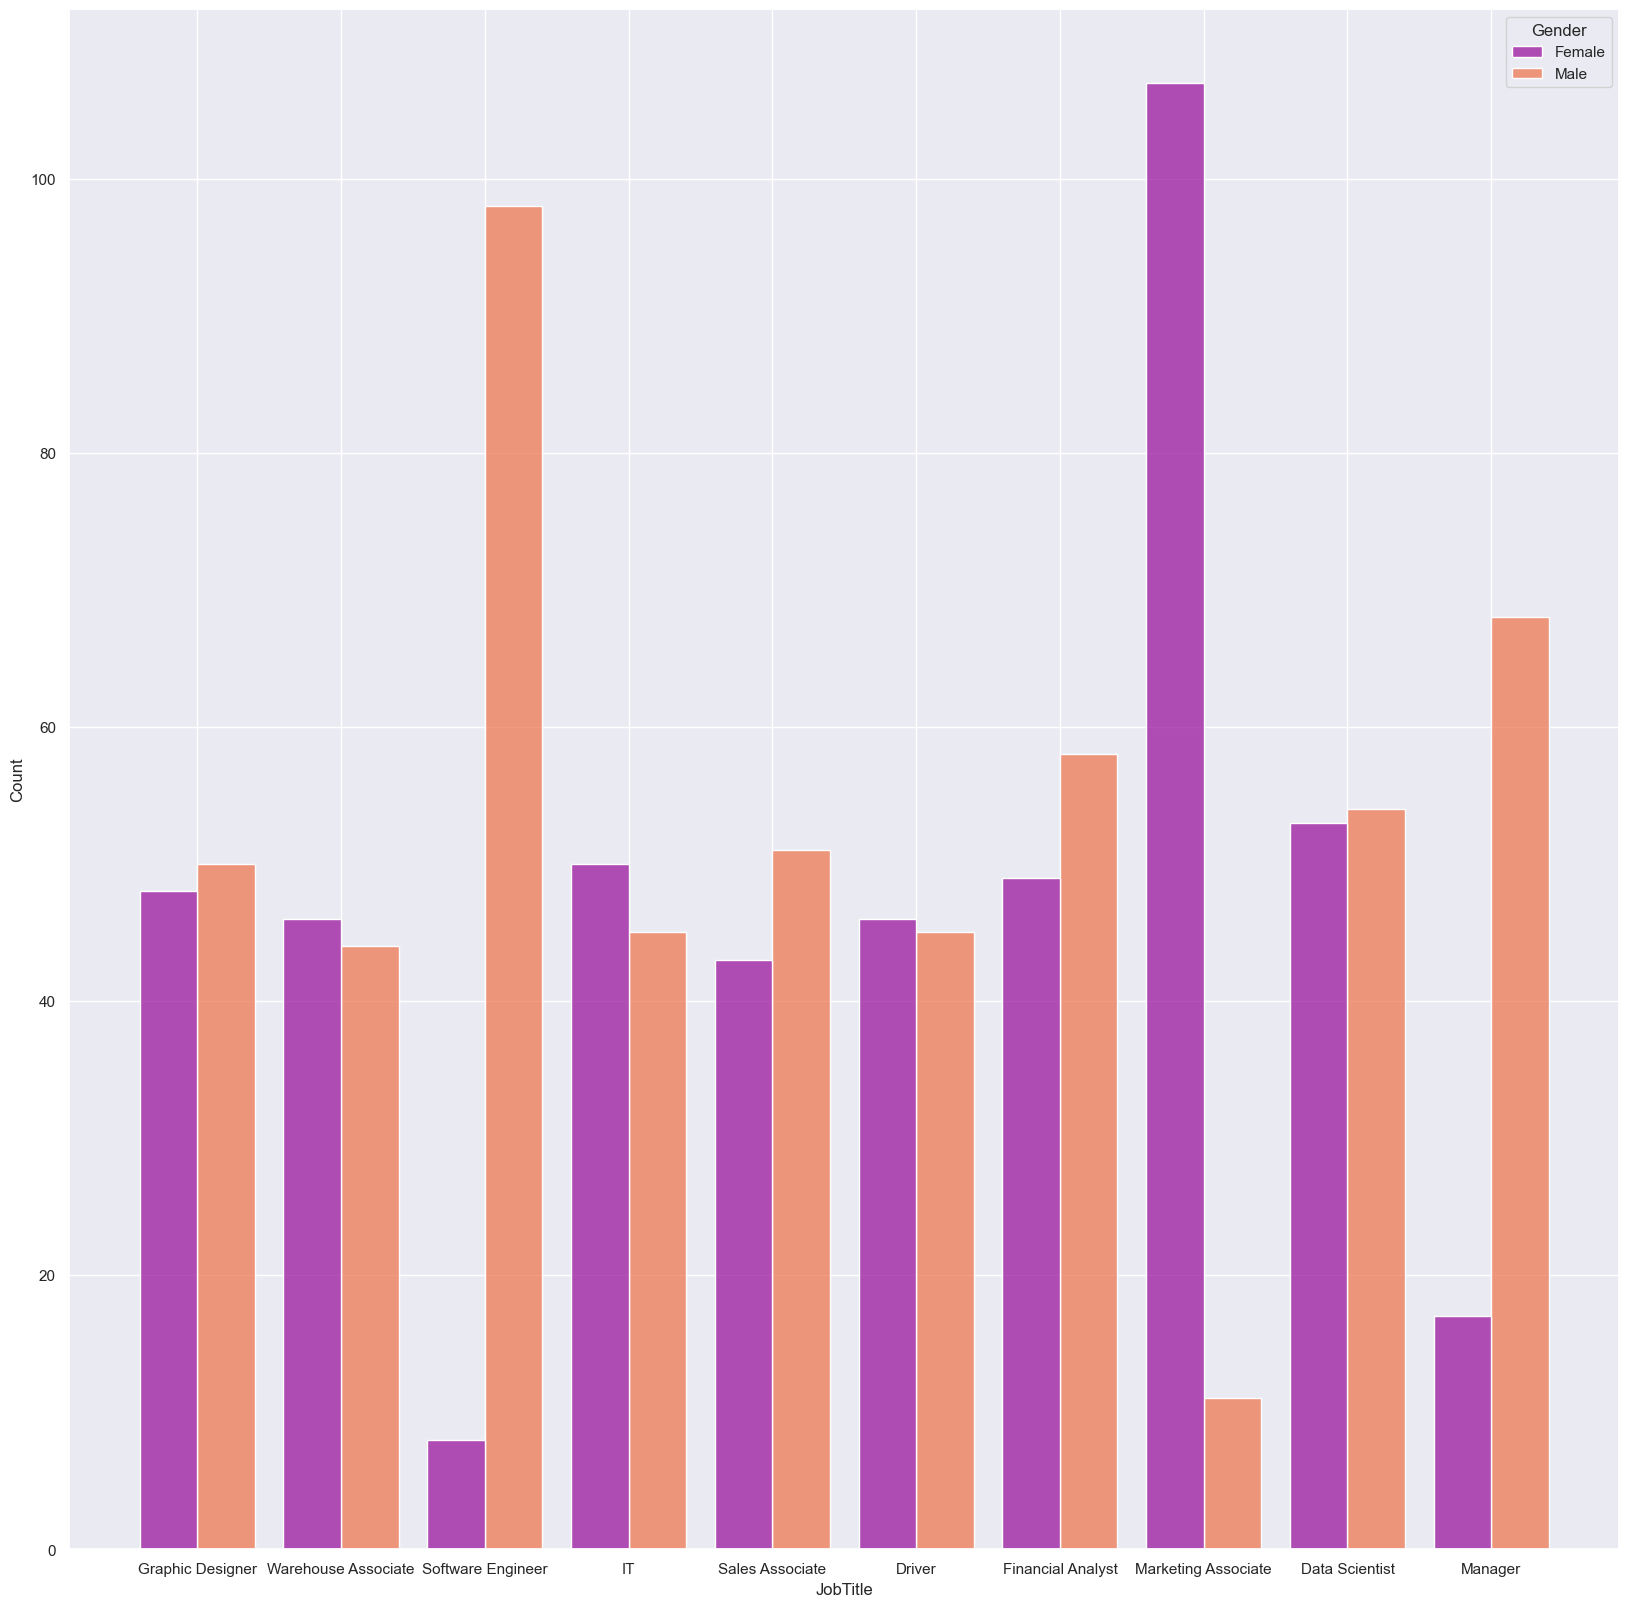

In [87]:
jt = sns.histplot(x='JobTitle', hue='Gender', multiple='dodge', data=paygap_data_subset, shrink=0.8, palette='plasma')
sns.set( rc = {'figure.figsize' : (20,20), 'axes.labelsize' : 12})

<AxesSubplot: xlabel='BasePay', ylabel='Bonus'>

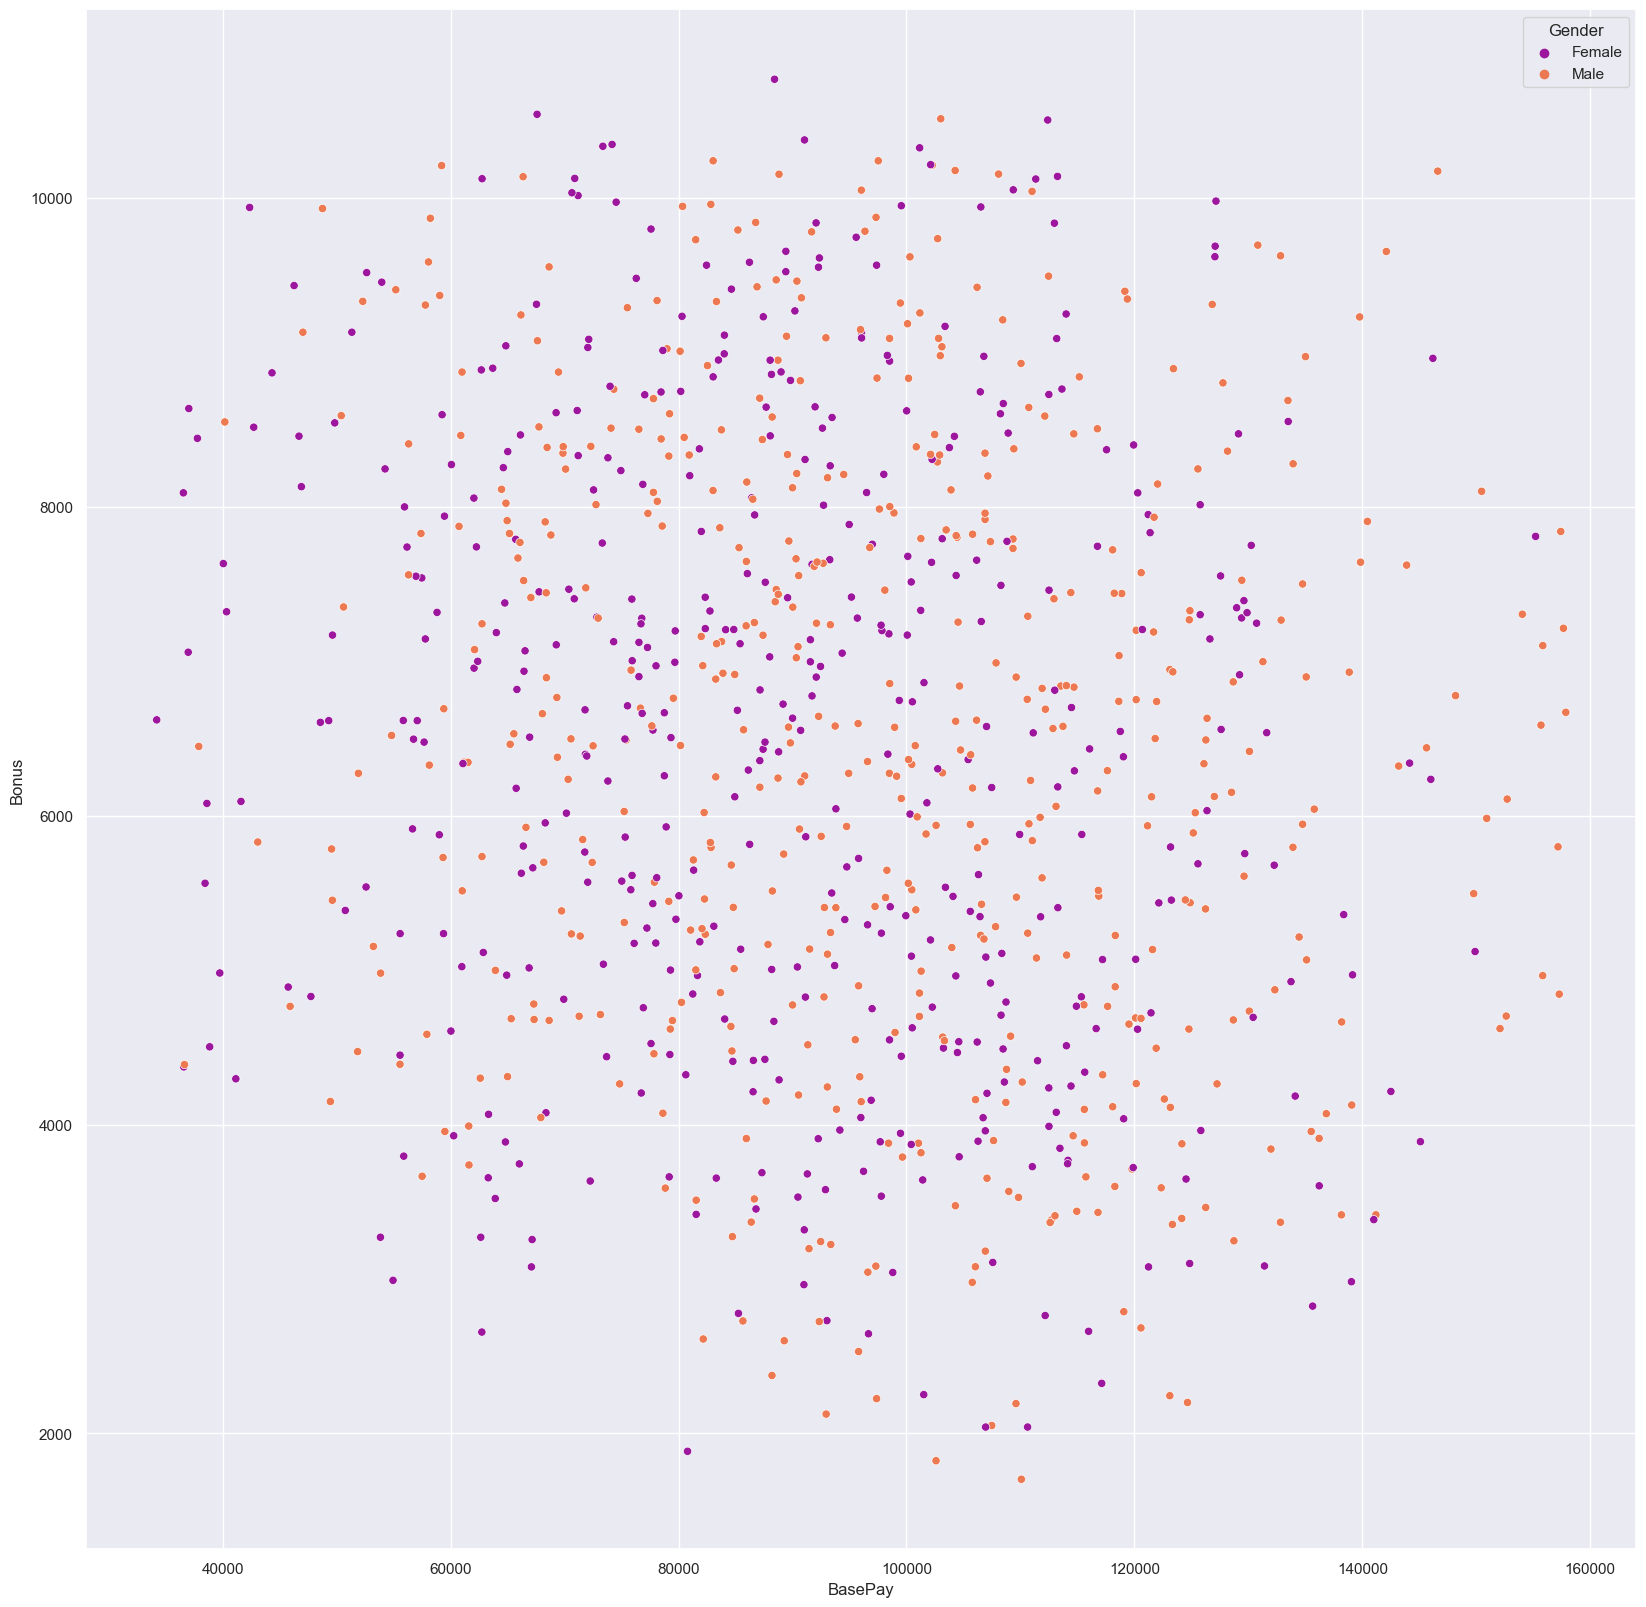

In [88]:
sns.scatterplot(x='BasePay', y='Bonus', data=paygap_data_subset, hue='Gender', palette='plasma')

## Correlation

In [90]:
paygap_data_subset.corr().round(2)

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/2131884725.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,BasePay,Bonus
Age,1.00,0.56,-0.41
BasePay,0.56,1.00,-0.13
Bonus,-0.41,-0.13,1.00


/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/1722773405.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

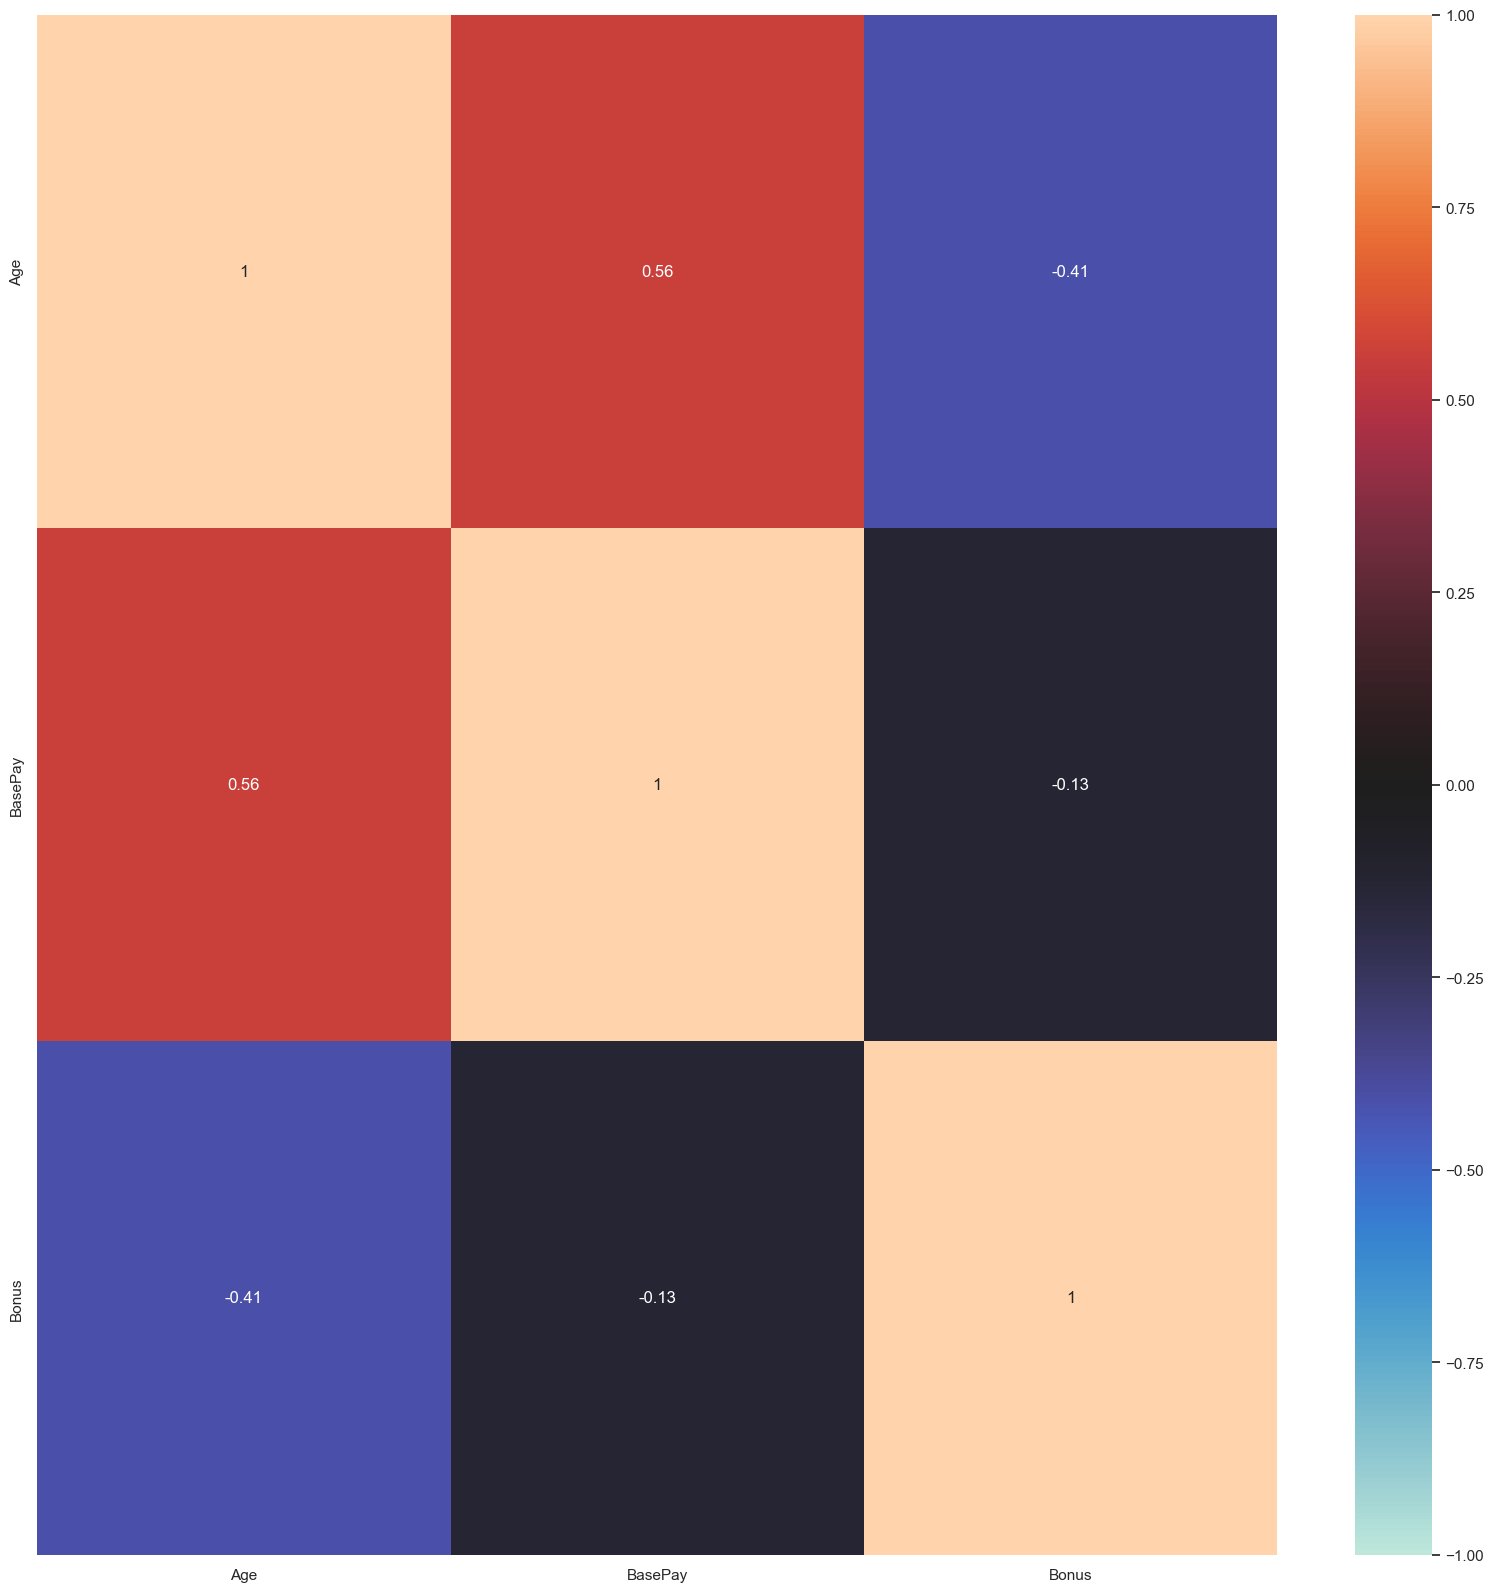

In [96]:
sns.heatmap(paygap_data_subset.corr().round(2), annot=True, vmin=-1, vmax=1, center=0)

In [97]:
matrix = paygap_data_subset.corr().round(2)
mask= np.triu(np.ones_like(matrix, dtype=bool))
mask

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_29750/1283481322.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

<AxesSubplot: >

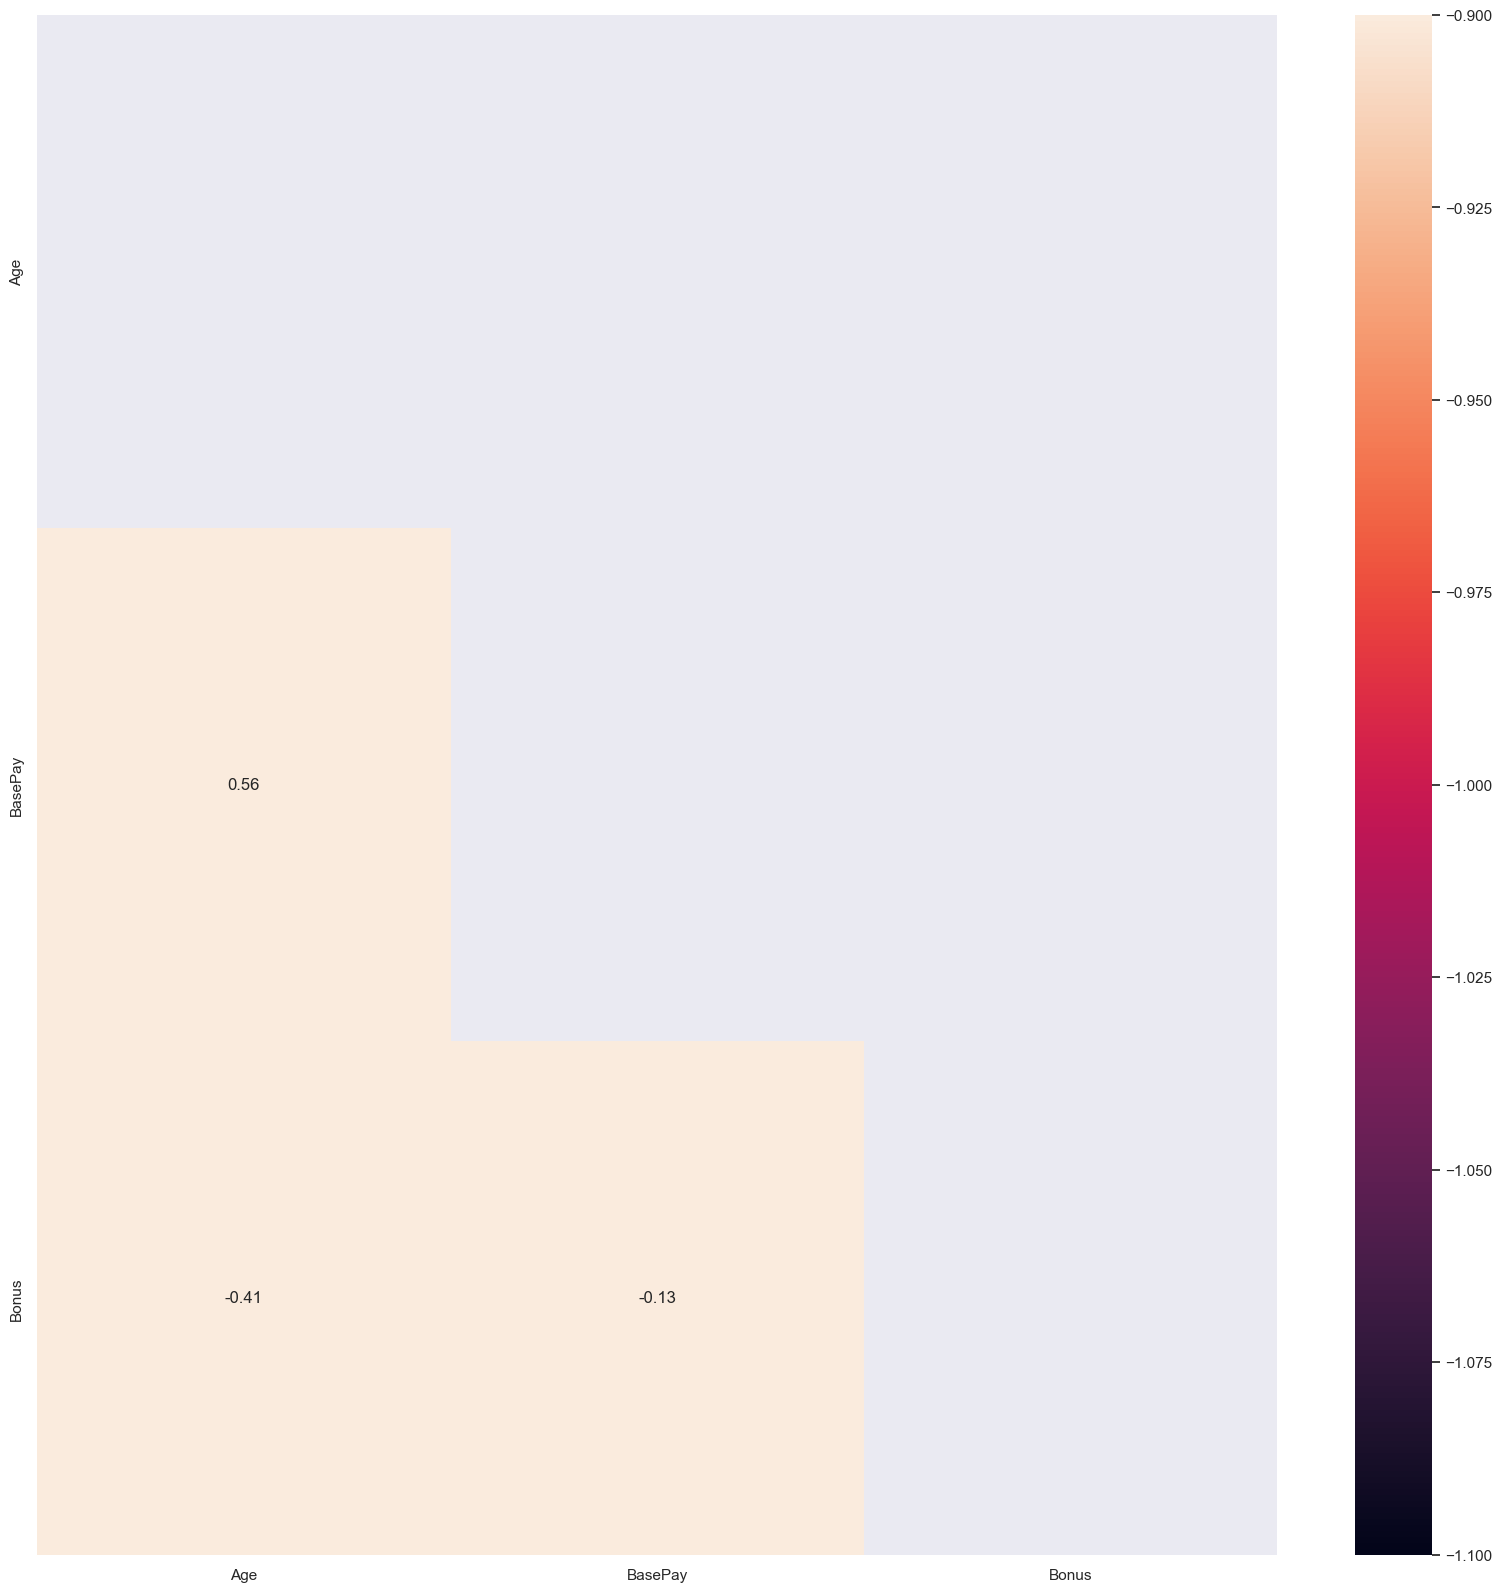

In [98]:
sns.heatmap(matrix, annot=True, vmax=-1, vmin=-1, mask=mask)

In [99]:
matrix = matrix.unstack()
matrix

Age      Age        1.00
         BasePay    0.56
         Bonus     -0.41
BasePay  Age        0.56
         BasePay    1.00
         Bonus     -0.13
Bonus    Age       -0.41
         BasePay   -0.13
         Bonus      1.00
dtype: float64

## Linear Regression

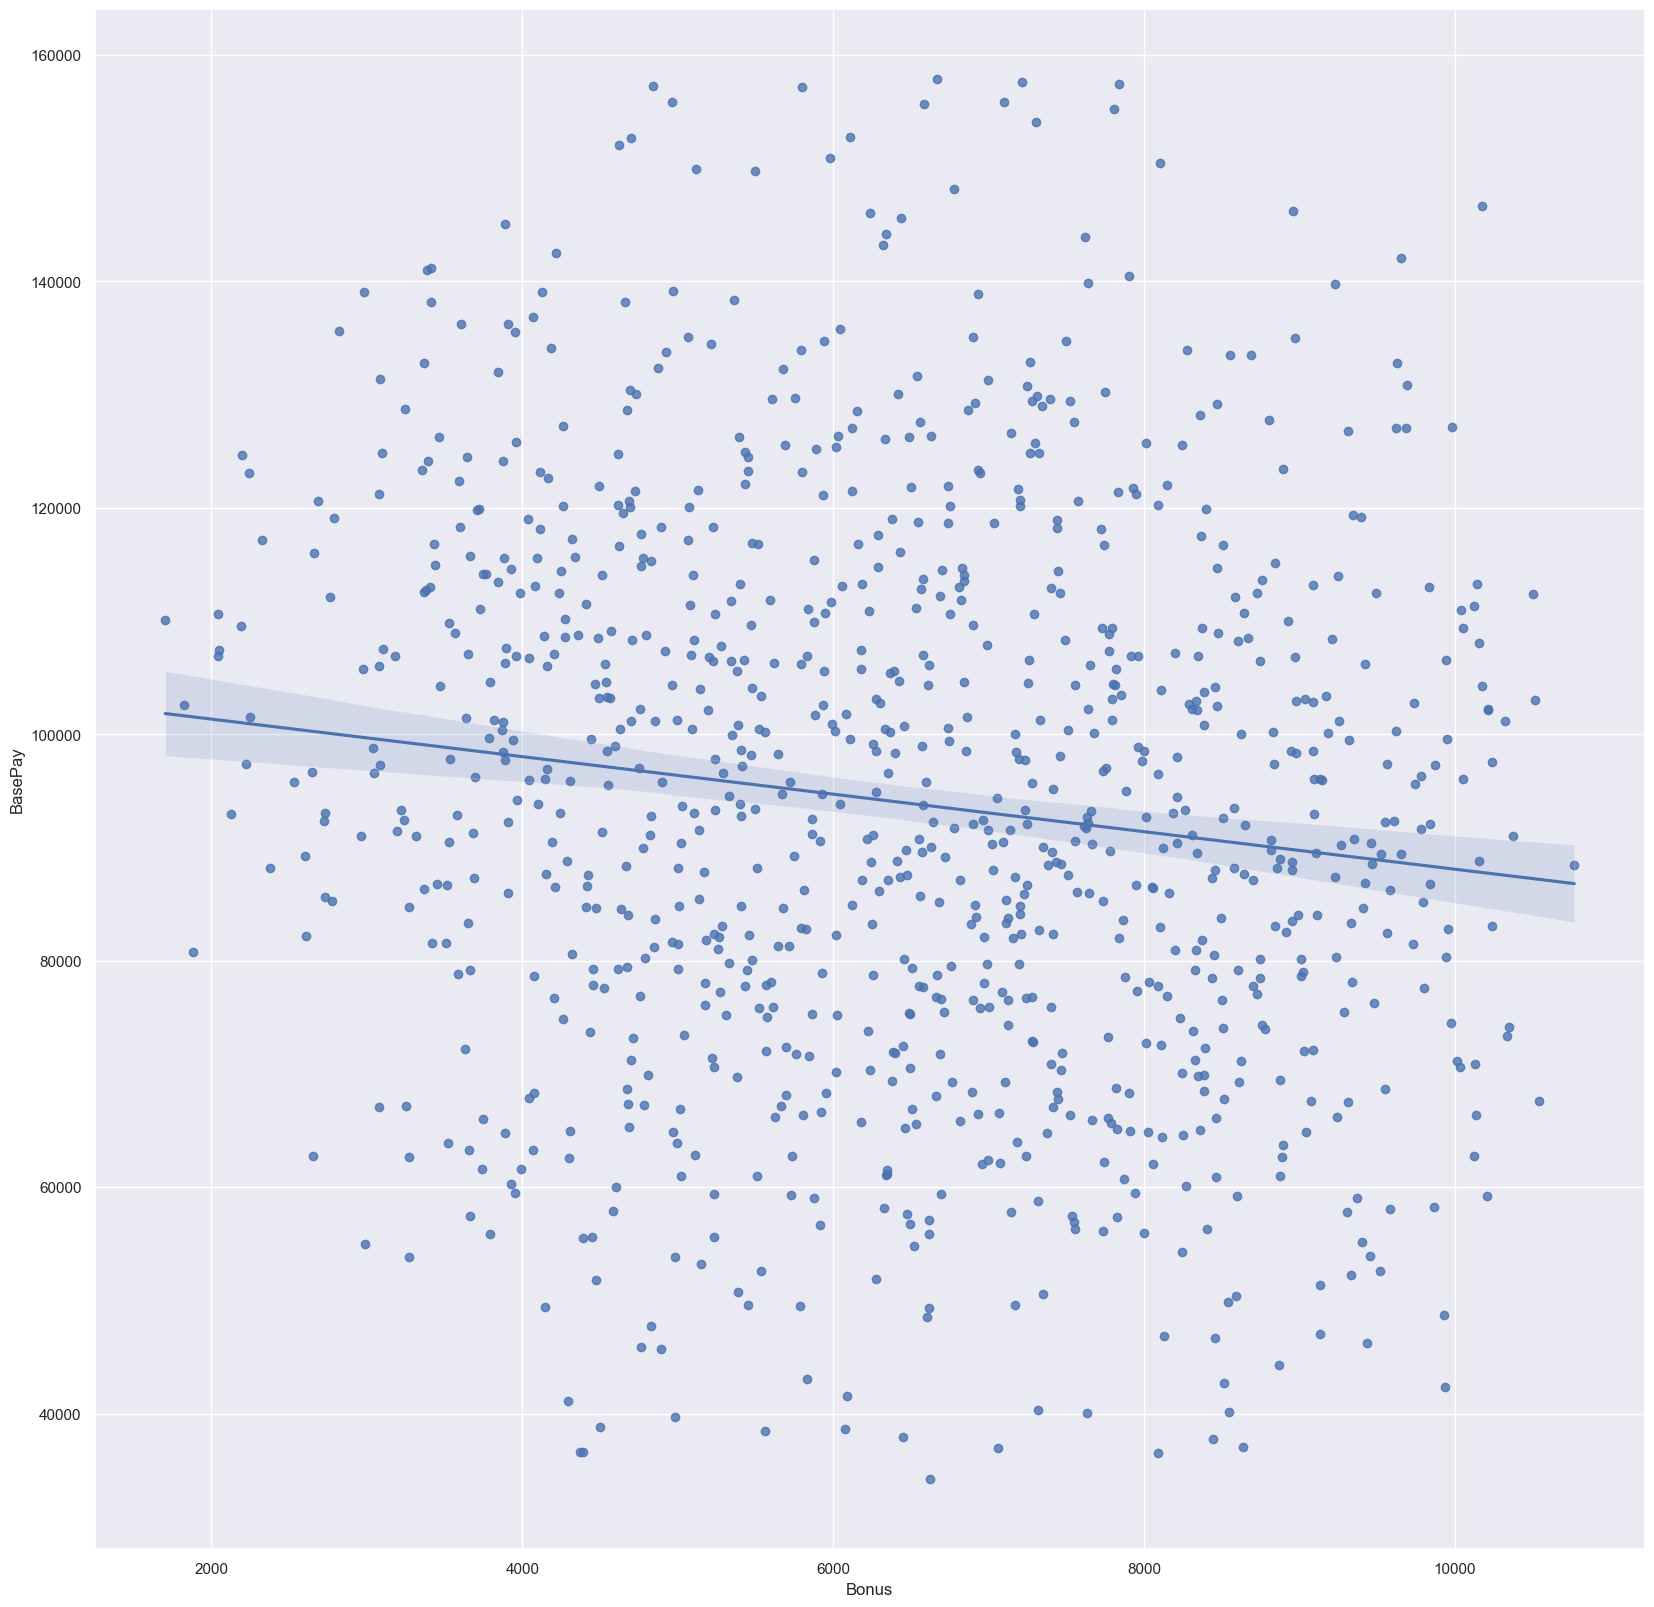

In [104]:
sns.regplot(x='Bonus', y='BasePay', data=paygap_data_subset);

<AxesSubplot: xlabel='Bonus', ylabel='BasePay'>

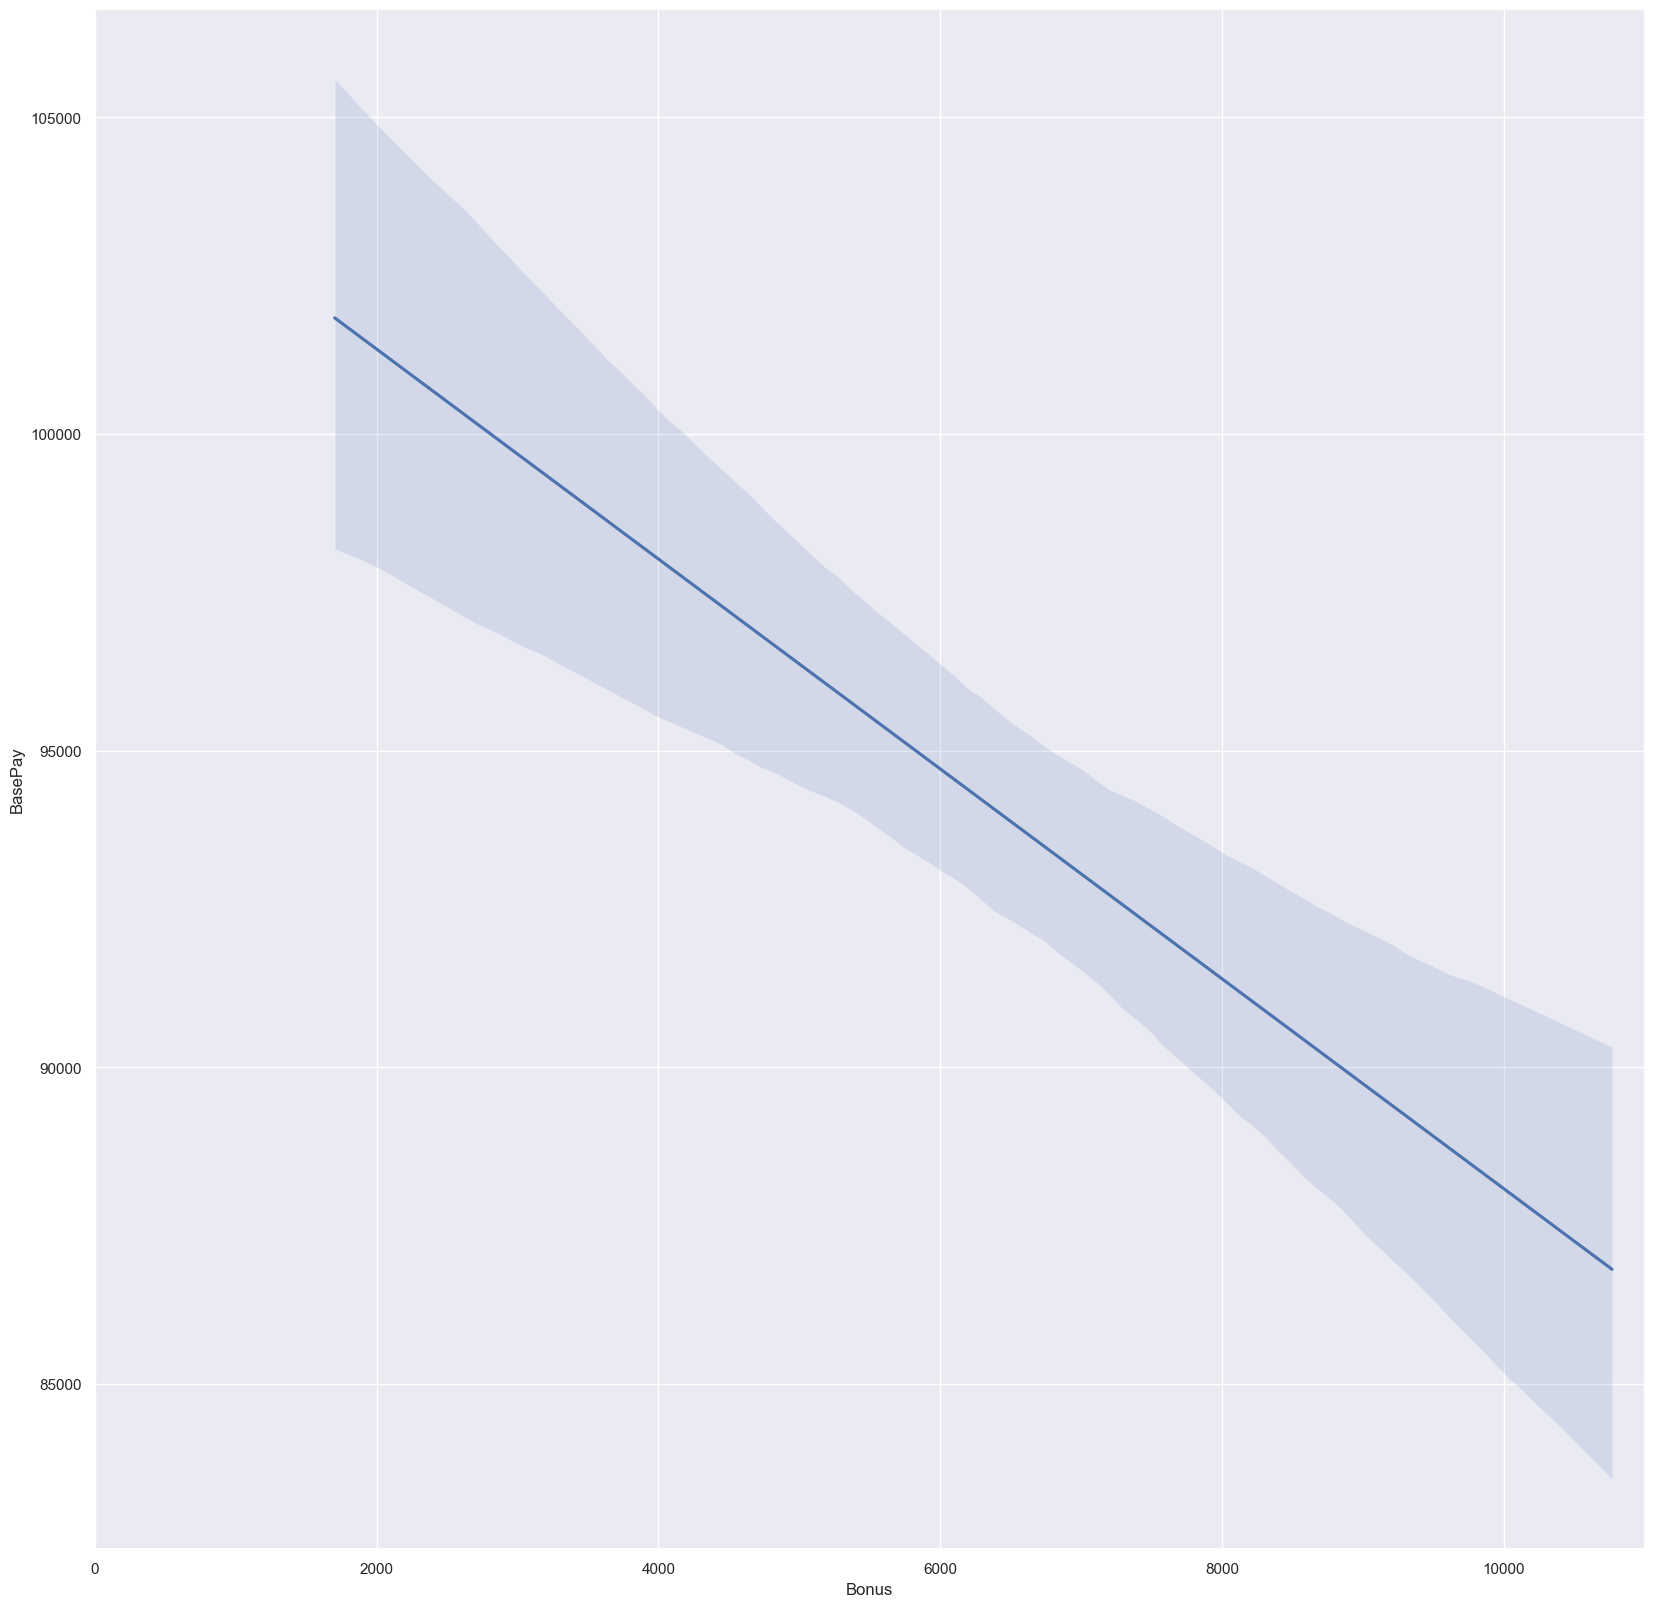

In [108]:
plt.gca().set(xlim=(0,11000))
sns.regplot(x='Bonus', y='BasePay', data=paygap_data_subset, scatter=False)

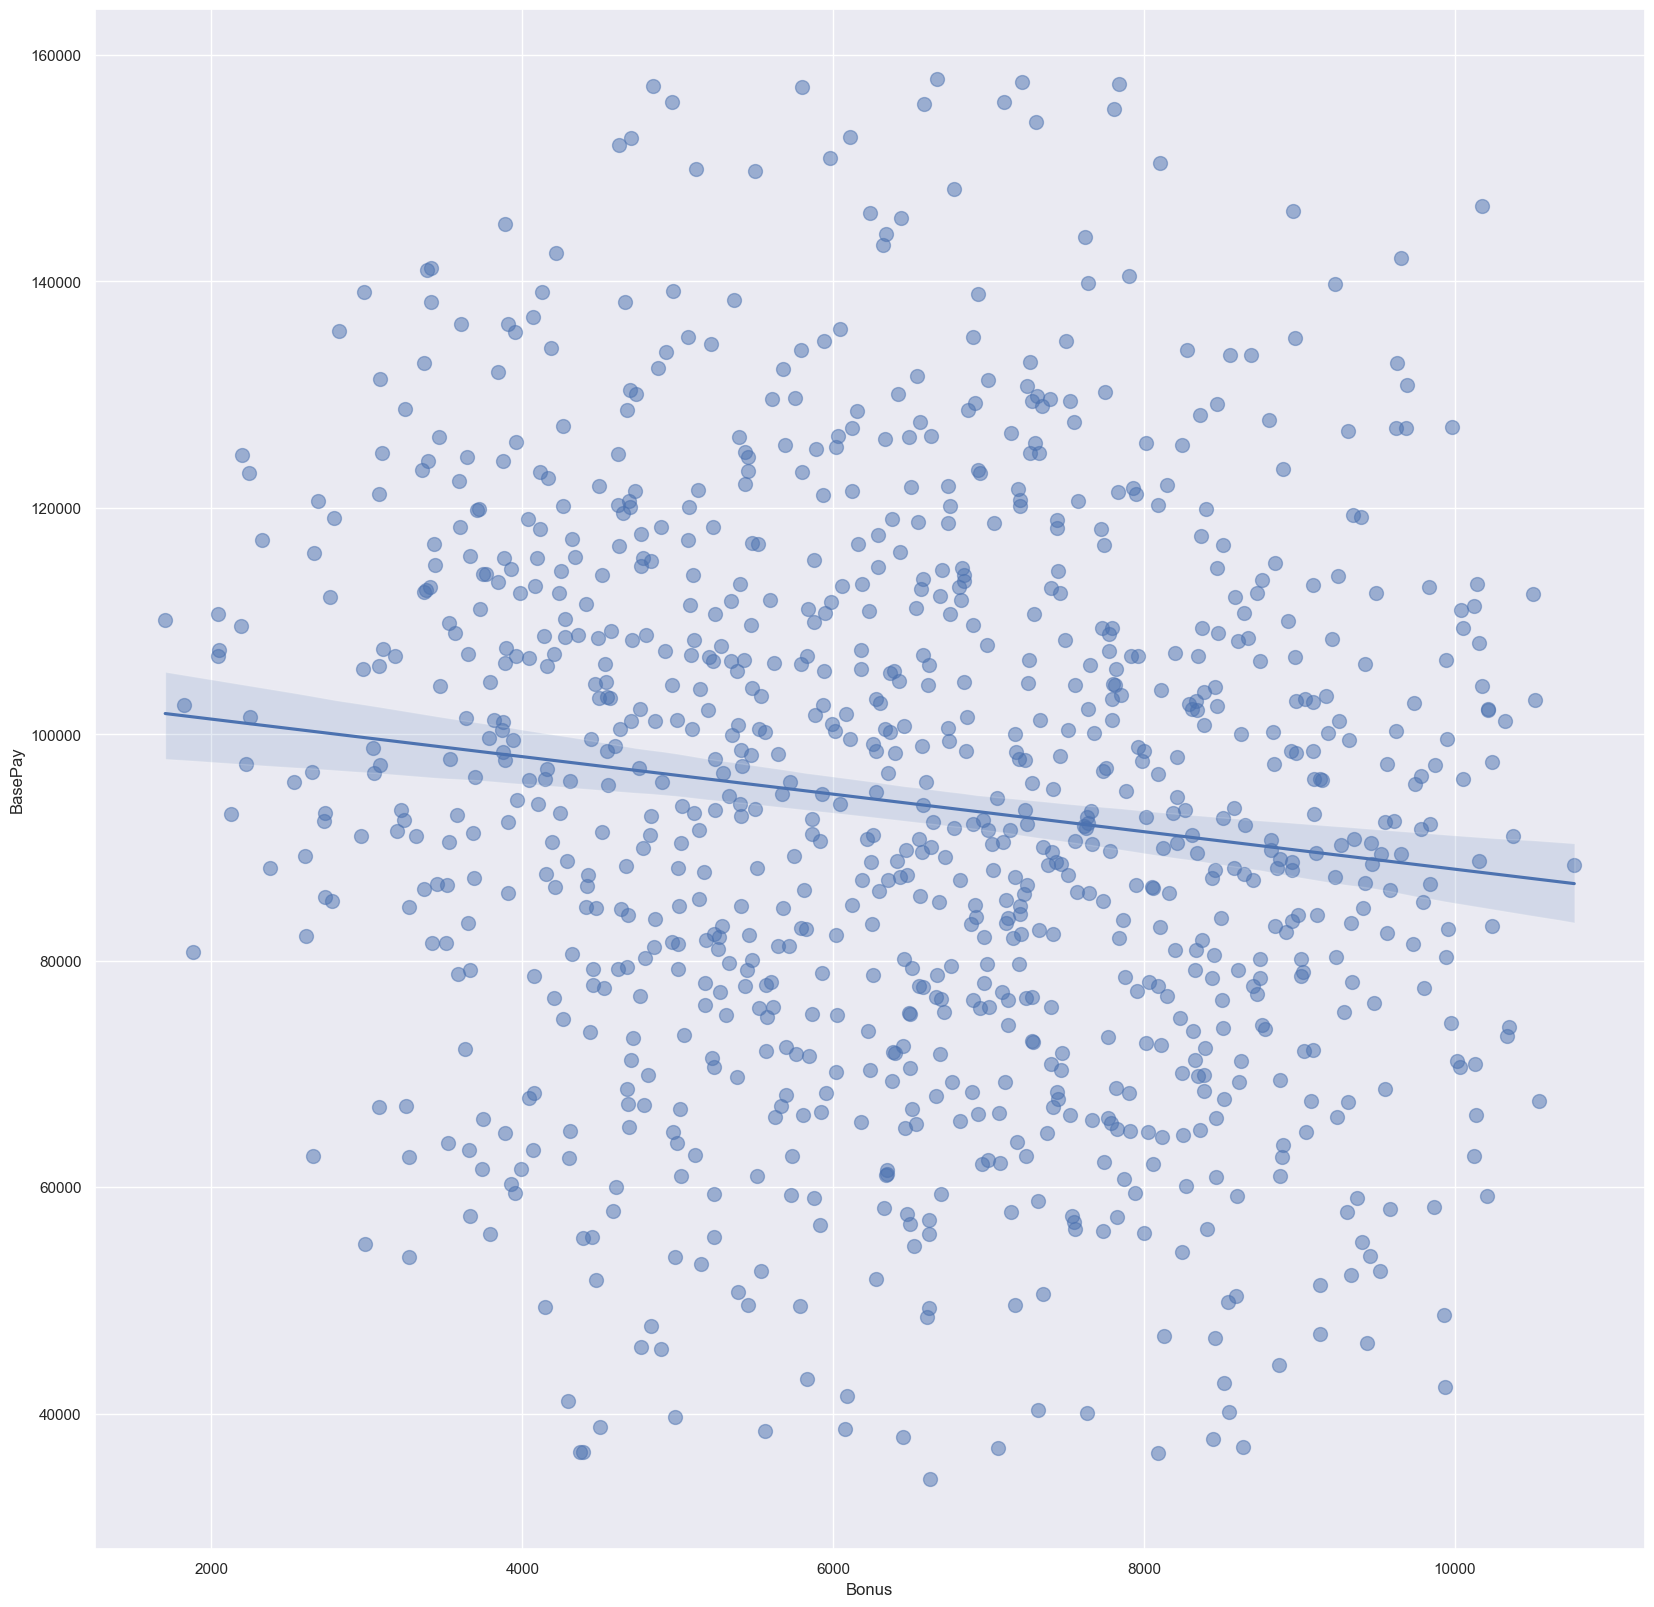

In [118]:
sns.regplot(x='Bonus', y='BasePay', data=paygap_data_subset, 
            scatter_kws={'s':100, 'alpha':0.5});

In [31]:
# pgx = sb.barplot(data=paygap_data, x="Dept", y="PerfEval", hue="Gender")

In [32]:
# pgx2 = sb.barplot(data=paygap_data, x="Dept", y="Seniority", hue="Gender")

In [33]:
# pgx3 = sb.barplot(data=paygap_data, x="Dept", y="Bonus", hue="Gender")

In [34]:
# pgx4 = sb.barplot(data=paygap_data, x="Dept", y="BasePay", hue="Gender")

In [35]:
# pgx5 = sb.barplot(data=paygap_data, x="Education", y="BasePay", hue="Gender")

In [36]:
# import pandas as pd
# import plotly.express as px
# df = pd.read_csv('Glassdoor Gender Pay Gap.csv', index_col = False, header = 0, sep = ';', engine='python')

In [37]:
# df_stack=df.groupby(['Gender','Education']).size().reset_index()
# df_stack['Percentage']=df.groupby(['Gender','Education']).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values
# df_stack.columns= ['Gender', 'Education', 'Counts', 'Percentage']
# df_stack['Percentage'] = df_stack['Percentage'].map('{:,.2f}%'.format) 

In [38]:
# stackfig = px.ba(df, x = 'Gender', y = 'Counts', color='Education', barmode='stack')

# stackfig.update_layout(title = "Education by Gender", xaxis_title='Gender", yaxis_title= 'Counts', width= 1600, height = 1400)

# stackfig.show()